This file, intended for Python 2.7, reads in raw output from GP Microbiome and processes it, saving the data to csv files for use with up-to-date versions of Python. 

In [1]:
import pickle
from numpy import *


In [18]:
#This code uses the data from participant 708, so adjust your file names and paths accordingly. You could also use it to 
#create a loop or function to read in multiple output files at once. I did not do so because I was not originally
#expecting to run GP Microbiome repeatedly, and because I was being extra cautious with the somewhat complicated output
#format. I used loops and functions later.
T,T_p,samples = pickle.load(open(r'C:\Users\Virginia\GPMicrobiome-master\samples_708.p','r'))

In [44]:
#view a list of the variables in the output file
print samples.keys()

[u'G_d', u'G_i', u'F', u'Beta', u'eta_sq', u'inv_rho_sq', u'sigma_sq', u'rho_sq', u'Theta_G', u'Theta_G_i', u'lp__']


The variables in the output file if predictions are made. These are explained in the research paper accompanying GPMicrobiome. Of primary interest are Theta_G, the noise-free compositions, and Theta_G_i, the noise-free compositions with predictions
<img src= 'https://i.imgur.com/AbgLDRO.png' style='height:75px'>

In [19]:
#print the means of the Theta_G variable, and the Theta_G_i variable if predictions have been made
print samples['Theta_G'].mean(0).T
if samples.has_key('Theta_G_i'):
  print samples['Theta_G_i'].mean(0).T

[[2.39135958e-05 7.05795166e-08 3.40259212e-05 ... 1.08114578e-04
  2.00749426e-08 1.86165812e-07]
 [8.31290555e-03 4.93166201e-08 2.32248216e-03 ... 1.15298868e-03
  4.93519296e-07 3.22174916e-07]
 [3.13171944e-05 7.91693485e-08 1.22207326e-05 ... 3.08864170e-05
  3.70908037e-08 4.23696208e-06]
 ...
 [2.20207732e-05 5.64016911e-08 2.34334644e-05 ... 1.73181103e-05
  1.35084366e-07 3.07807693e-07]
 [3.71023090e-05 5.21019031e-08 5.00081612e-05 ... 1.48266649e-04
  6.49847777e-08 6.16496649e-07]
 [1.58640739e-06 1.92245140e-09 9.39765603e-07 ... 6.69035677e-04
  3.13288996e-09 1.30101944e-08]]
[[3.70012856e-03 5.81051741e-03 1.26219974e-03 ... 4.44642453e-03
  1.36169823e-03 9.81214540e-04]
 [8.18996012e-03 2.42966740e-03 1.36566343e-02 ... 8.97595514e-03
  1.05424153e-02 7.26310159e-03]
 [8.11652247e-04 2.67618293e-04 4.89394184e-04 ... 7.07866652e-04
  1.80037633e-03 6.13872097e-03]
 ...
 [3.79364276e-03 4.58926732e-03 1.10675958e-03 ... 1.66618282e-03
  5.47720569e-04 2.68396699e-03]

Example Output, using the sample data with 7 time points and 2 prediction time points for 3 OTU's
<img src='https://i.imgur.com/55KfUEN.png' style='height:200px'>

In [20]:
#Examine the time points array to make sure it was saved correctly
T

array([   0.,  413.,  574.,  637.,  840.,  917., 1064., 1204., 1323.,
       1401., 1505., 1596., 1778.])

In [28]:
#Convert the array to a list
T=T.tolist()

In [21]:
#Examine the prediction time points array to make sure it was saved correctly
T_p

array([ 206.,  493.,  605.,  738.,  878.,  990., 1134., 1263., 1362.,
       1453., 1550., 1687., 1958., 2138., 2318., 2498.])

In [29]:
#Convert the array to a list
T_p=T_p.tolist()

In [30]:
#Make a single list for both sets of time points, for reference 
T_both = T+T_p
T_both

[0.0,
 413.0,
 574.0,
 637.0,
 840.0,
 917.0,
 1064.0,
 1204.0,
 1323.0,
 1401.0,
 1505.0,
 1596.0,
 1778.0,
 206.0,
 493.0,
 605.0,
 738.0,
 878.0,
 990.0,
 1134.0,
 1263.0,
 1362.0,
 1453.0,
 1550.0,
 1687.0,
 1958.0,
 2138.0,
 2318.0,
 2498.0]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

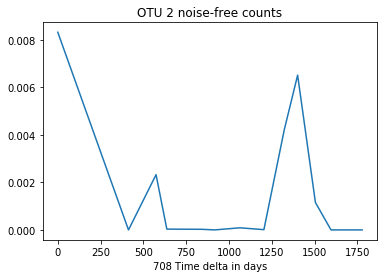

In [34]:
#Do a quick exploratory plot
plt.plot(T,samples['Theta_G'].mean(0).T[1])
plt.title('OTU 2 noise-free counts')
plt.xlabel('708 Time delta in days')
plt.show()

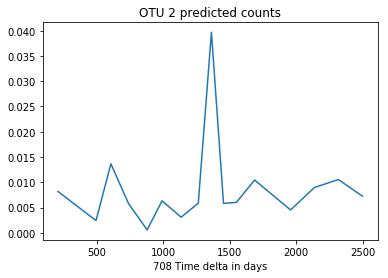

In [35]:
#Do a second plot, of the predicted values
plt.plot(T_p,samples['Theta_G_i'].mean(0).T[1])
plt.title('OTU 2 predicted counts')
plt.xlabel('708 Time delta in days')
plt.show()

In [14]:
import pandas as pd

In [36]:
#Create a data frame with the timepoints in the first row and the OTU's in the following rows
df=pd.DataFrame(samples['Theta_G'].mean(0).T, columns=[i for i in range(len(T))], index=[i+1 for i in range(245)])
df.loc[0] = T
df=df.sort_index()
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,4.130000e+02,574.000000,637.000000,840.000000,9.170000e+02,1064.000000,1.204000e+03,1323.000000,1401.000000,1505.000000,1.596000e+03,1.778000e+03
1,0.000024,7.057952e-08,0.000034,0.000026,0.000162,3.739053e-06,0.000298,6.753712e-07,0.000021,0.000072,0.000108,2.007494e-08,1.861658e-07
2,0.008313,4.931662e-08,0.002322,0.000033,0.000026,9.477335e-07,0.000089,1.074878e-05,0.004211,0.006508,0.001153,4.935193e-07,3.221749e-07
3,0.000031,7.916935e-08,0.000012,0.000005,0.000917,3.237124e-06,0.000076,1.660465e-06,0.000012,0.000001,0.000031,3.709080e-08,4.236962e-06
4,0.000036,2.933750e-08,0.000175,0.000004,0.000162,7.775580e-06,0.000253,2.645071e-06,0.000012,0.000002,0.000030,3.323819e-08,8.362997e-08


Example dataframe using sample data
<img src='https://i.imgur.com/V9hEKwq.png' style='height:150px'>

In [111]:
#Save to csv for re-importing into code using an up-to-date version of Python
df.to_csv('708.csv', index=False)

In [37]:
#Create a second data frame for just the prediction time points and values, with the same format as before but column values starting 
#after the last value of the other data frame's columns
df2=pd.DataFrame(samples['Theta_G_i'].mean(0).T, columns=[i for i in range(len(T),len(T)+len(T_p))], index=[i+1 for i in range(245)])
df2.loc[0] = T_p
df2 = df2.sort_index()
df2.head()

,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,206.000000,493.000000,605.000000,738.000000,878.000000,990.000000,1134.000000,1263.000000,1362.000000,1453.000000,1550.000000,1687.000000,1958.000000,2138.000000,2318.000000,2498.000000
1,0.003700,0.005811,0.001262,0.003342,0.000522,0.001200,0.005451,0.000246,0.000245,0.002222,0.000515,0.001073,0.003134,0.004446,0.001362,0.000981
2,0.008190,0.002430,0.013657,0.005772,0.000572,0.006321,0.003088,0.005864,0.039693,0.005821,0.006024,0.010442,0.004524,0.008976,0.010542,0.007263
3,0.000812,0.000268,0.000489,0.001399,0.000244,0.001327,0.001513,0.000678,0.000232,0.000602,0.001758,0.005352,0.001002,0.000708,0.001800,0.006139
4,0.000656,0.001005,0.000761,0.006136,0.008322,0.002593,0.002806,0.001684,0.004772,0.000777,0.000412,0.004509,0.000856,0.006023,0.005939,0.000521


In [113]:
#Save to csv 
df2.to_csv('708_pred.csv',index=False)

In [38]:
#Combine the two data frames 
dfboth = pd.concat([df, df2], axis=1, sort=False)
dfboth.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,4.130000e+02,574.000000,637.000000,840.000000,9.170000e+02,1064.000000,1.204000e+03,1323.000000,1401.000000,...,1134.000000,1263.000000,1362.000000,1453.000000,1550.000000,1687.000000,1958.000000,2138.000000,2318.000000,2498.000000
1,0.000024,7.057952e-08,0.000034,0.000026,0.000162,3.739053e-06,0.000298,6.753712e-07,0.000021,0.000072,...,0.005451,0.000246,0.000245,0.002222,0.000515,0.001073,0.003134,0.004446,0.001362,0.000981
2,0.008313,4.931662e-08,0.002322,0.000033,0.000026,9.477335e-07,0.000089,1.074878e-05,0.004211,0.006508,...,0.003088,0.005864,0.039693,0.005821,0.006024,0.010442,0.004524,0.008976,0.010542,0.007263
3,0.000031,7.916935e-08,0.000012,0.000005,0.000917,3.237124e-06,0.000076,1.660465e-06,0.000012,0.000001,...,0.001513,0.000678,0.000232,0.000602,0.001758,0.005352,0.001002,0.000708,0.001800,0.006139
4,0.000036,2.933750e-08,0.000175,0.000004,0.000162,7.775580e-06,0.000253,2.645071e-06,0.000012,0.000002,...,0.002806,0.001684,0.004772,0.000777,0.000412,0.004509,0.000856,0.006023,0.005939,0.000521
5,0.000011,3.556579e-08,0.000029,0.000427,0.000055,1.557900e-05,0.000024,1.227224e-05,0.000009,0.000001,...,0.010675,0.005647,0.005346,0.006001,0.005410,0.011836,0.007879,0.012750,0.001510,0.002722
6,0.000022,3.316004e-08,0.000027,0.000061,0.000045,2.460691e-06,0.000016,1.821457e-06,0.000007,0.000004,...,0.003400,0.002351,0.000237,0.006845,0.010886,0.002987,0.000701,0.002995,0.000608,0.001086
7,0.000010,3.232670e-08,0.000028,0.000286,0.000212,6.207014e-06,0.000020,1.970223e-06,0.000019,0.000002,...,0.000698,0.003653,0.000072,0.004790,0.000696,0.005118,0.001110,0.003226,0.000964,0.000551
8,0.000040,1.374049e-08,0.000005,0.000075,0.000204,7.376274e-06,0.000116,3.049618e-06,0.000013,0.000001,...,0.000952,0.003832,0.000349,0.000748,0.000360,0.000603,0.012648,0.000240,0.000258,0.000668
9,0.000014,2.948747e-08,0.000006,0.000002,0.000379,3.061930e-06,0.000079,2.796873e-06,0.000009,0.000003,...,0.001642,0.000554,0.000512,0.000432,0.000195,0.001323,0.001134,0.000728,0.000902,0.000477


In [115]:
#Save to csv for use later with an up-to-date version of Python
dfboth.to_csv('708_both.csv', index=False)